In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, stats

In [28]:
df = pd.read_csv('C:\Users\John\Documents\GitHub\dissertation\ROP_alldata.csv', index_col=0)
#Phases:
# PRE, ED1, ED2, ED3, DURING, AFTER

In [29]:
df1 = df.loc[df['ID'] == 13]
df2 = df.loc[df['ID'] == 31]
#one hour pre, one hour post

In [30]:
data1a = df1.loc[df1['Phase'] == 'PRE']
data1a = data1a.iloc[-1800:].dropna() #before eyedrops

data1b = df1.loc[df1['Phase'] == 'AFTER']
data1b = data1b.iloc[:1800].dropna() #after exam

data2a = df2.loc[df2['Phase'] == 'PRE']
data2a = data2a.iloc[-1800:].dropna() #before eyedrops

data2b = df2.loc[df2['Phase'] == 'AFTER']
data2b = data2b.iloc[:1800].dropna() #after exam

In [41]:
#Function to batch save plots
def plotO2s(data, name):
    
    data[['SpO2', 'StO2', 'FTOE']].plot()
    plt.ylabel('O2 Saturation%, and O2 Extraction')
    plt.xlabel('Time (s)')
    plt.ylim(-5, 105)
    plt.savefig('C:\Users\John\Documents\GitHub\dissertation\plots\O2raw_' + name + '.png', dpi=300)
    
    return

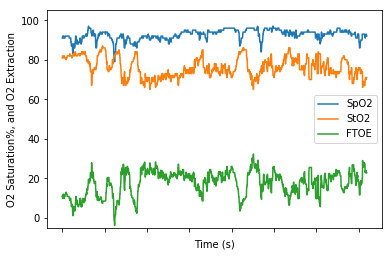

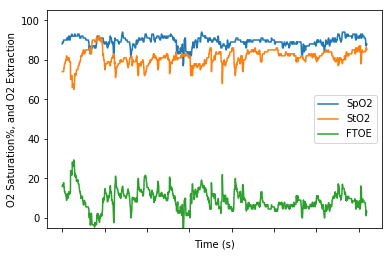

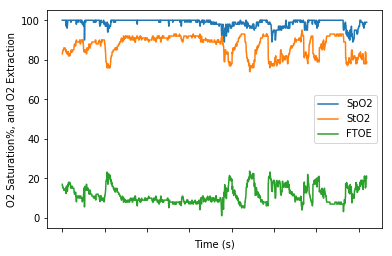

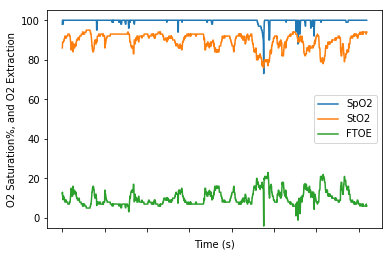

In [42]:
plotO2s(data1a, '1a')
plotO2s(data1b, '1b')
plotO2s(data2a, '2a')
plotO2s(data2b, '2b')

In [33]:
def plotO2change(data, name):
    data[['SpO2', 'StO2']].diff().plot()
    plt.ylabel('Change in O2%')
    plt.xlabel('Time (s)')
    plt.ylim(-10, 10)
    plt.savefig('C:\Users\John\Documents\GitHub\dissertation\plots\O2change_' + name + '.png', dpi=300)
    return

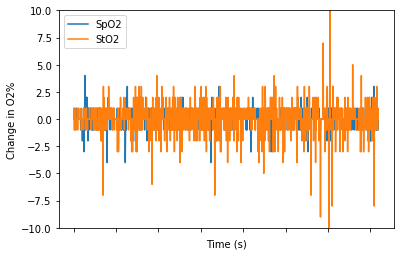

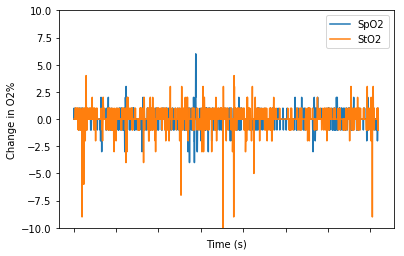

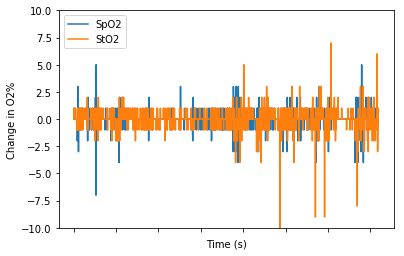

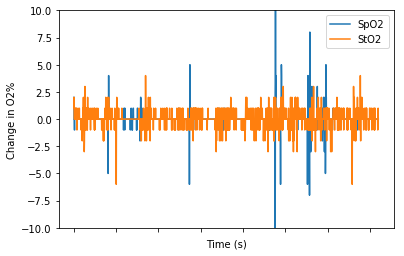

In [34]:
plotO2change(data1a, '1a')
plotO2change(data1b, '1b')
plotO2change(data2a, '2a')
plotO2change(data2b, '2b')

In [35]:
def plotHR(data, name):
    data['HR'].plot(color='red')
    plt.ylabel('HR (bpm)')
    plt.xlabel('Time (s)')
    plt.ylim(130, 190)
    plt.savefig('C:\Users\John\Documents\GitHub\dissertation\plots\HR_' + name + '.png', dpi=300)
    plt.show()
    

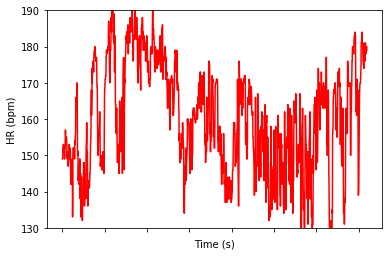

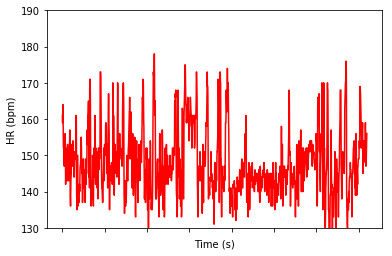

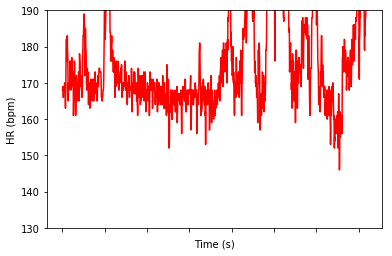

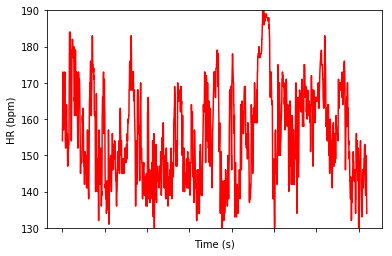

In [36]:
plotHR(data1a, '1a')
plotHR(data1b, '1b')
plotHR(data2a, '2a')
plotHR(data2b, '2b')

In [37]:
def zHRFTOE(data, name):

#Z-Score + SG Filter

    window_length = 31
    polyorder = 2
    

    y1 = signal.savgol_filter(stats.zscore(data['HR']), window_length, polyorder)
    y2 = signal.savgol_filter(stats.zscore(data['FTOE']), window_length, polyorder)
    x = np.arange(0, len(y1), 1)
    
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y1, linewidth=2,
                     label='z(HR)', color='red')

    line2, = ax.plot(x, y2, linewidth=2,
                     label='z(FTOE)', color='green')

    ax.legend(loc='lower right')

    plt.ylabel('z(HR), z(FTOE)')
    plt.xlabel('Time (s)')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='on',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    
    plt.legend(loc='upper right')
    plt.savefig('C:\Users\John\Documents\GitHub\dissertation\plots\zHR_zFTOE' + name + '.png', dpi=300)
    
    plt.show()
    
    

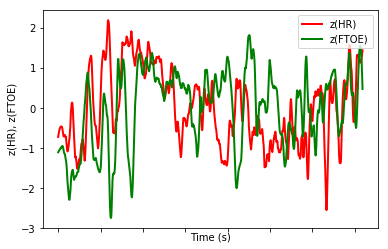

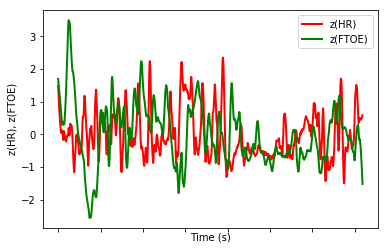

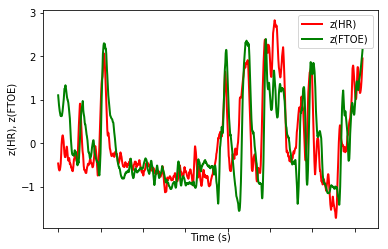

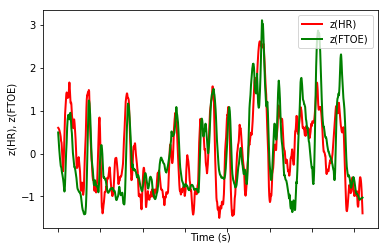

In [38]:
zHRFTOE(data1a, '1a')
zHRFTOE(data1b, '1b')
zHRFTOE(data2a, '2a')
zHRFTOE(data2b, '2b')